# 20160044 Shin Dong-Ha Assignment04
# Github Link : https://github.com/sinwindis/Assignment04

importing Necessary Libraries

In [188]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

CLASS DEFINITION: MNIST

In [189]:
class MNIST:
    label = int()
    imgData = list()
    def __init__(self, a, b):
        self.label = a
        self.imgData = b

내 코드

In [190]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

list_img = list()
list_centroid = list()
list_group = list()

DEFINE FUNCTION: data normalize

In [191]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

DEFINE FUNCTION: compute distance

In [192]:
def computeDistance(x, y):

    d = (x.imgData - y.imgData) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

DEFINE FUNCTION: Initiate Centroid (Initialize 'list_centroid' before use it)

In [193]:
def initCentroid(numofCluster):
    
    for v in range(numofCluster):
        list_centroid.append(list_img[v])

DEFINE FUNCTION: Visualize Centroids

In [194]:
def visCentroid(numofCluster):
    
    f1 = plt.figure(1)
    i = 0
    for centroid in list(list_centroid):
        label       = centroid.label
        im_vector   = centroid.imgData
        im_matrix   = im_vector.reshape((size_row, size_col))

        plt.subplot(1, 10, i+1)
        plt.title(label)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        i += 1

DEFINE FUNCTION : Decide Group (Initialize 'list_group' before use it)

In [195]:
#Input MNIST Type Data
def decideGroup(imagedata):
    
    min = computeDistance(list_centroid[0], imagedata)
    group = 0
    i = 0
    
    for centroid in list(list_centroid):
        if min > computeDistance(centroid, imagedata):
            min = computeDistance(centroid, imagedata)
            group = i
            
        i += 1
        
    list_group[group].append(imagedata)
    return min

DEFINE FUNCTION: Relocate Centroid

In [196]:
def relocateCentroid():

    centroidTemp = list()
    i = 0
    for centroid in list(list_centroid):
        centroidTemp.append(centroid.imgData)
        for v in range(len(centroid.imgData)):
            list_centroid[i].imgData[v] = 0
        for img in list(list_group[i]):
            list_centroid[i].imgData = np.add(img.imgData, list_centroid[i].imgData)
        for v in range(len(centroid.imgData)):
            list_centroid[i].imgData[v] /= len(list_group[i])
        i += 1

DEFINE FUNCTION: Calculate Accuracy

In [197]:
def calAcc():
    list_labelNum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    i = 0
    counter = 0
    num = 0
    for centroid in list(list_centroid):
        list_labelNum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for img in list(list_group[i]):
            num += 1
            list_labelNum[int(img.label)] += 1
        counter += max(list_labelNum)
    return (counter/num)

DEFINE FUNCTION: Re-Label

In [198]:
def reLabel(numofCluster):
    for i in range(numofCluster):
        list_labelNum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        maxVal = 0
        for img in list(list_group[i]):
            list_labelNum[int(img.label)] += 1
        maxVal = max(list_labelNum)
        for v in range(len(list_labelNum)):
            if maxVal == list_labelNum[v]:
                list_centroid[i].label = v

main function

================THE FIRST CENTROID================


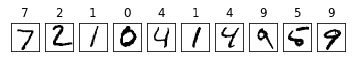

================THE 83 th CENTROID================


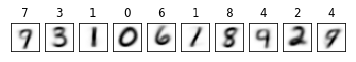

Ended at 83 th try


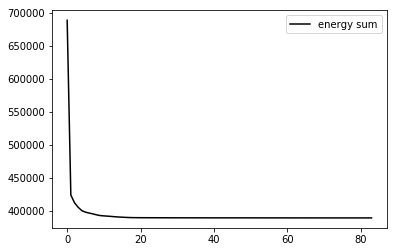

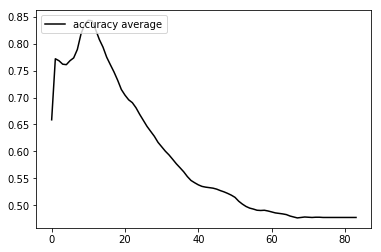

In [200]:
##CHANGE THIS VALUE TO DECIDE CLUSTER NUMBER
clusternum = 10

##CHANGE THIS VALUE TO DECIDE HOW MANY MNIST IMAGES TO USE
rangeNum = 10000

############################# FUNCTION IMPLEMENTATION #############################

#declare while condition variable and counting variable
checker = 1
counter = 0
energy_sum = 0
energy_temp = [-1]
acc_temp = list()
del acc_temp[:]

del list_img[:]

#Interpreting data
for i in range(rangeNum):

    line_data   = data[i].split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_img.append(MNIST(label, im_vector))

#Initializeing centroids
del list_centroid[:]
initCentroid(clusternum)

#visualize initial centroid
print("================THE FIRST CENTROID================")
visCentroid(list_centroid)
plt.show()
print("==================================================")

#loop until the energy value stops changing
while 1:
    energy_sum = 0
    del list_group[:]
    
    for centroid in list(list_centroid):
        list_group.append([])
            
    for img in list(list_img):
        energy_sum += decideGroup(img)
    acc_temp.append(calAcc())
    energy_temp.append(energy_sum)
    relocateCentroid()
    if energy_temp[counter] == energy_sum:
        reLabel(clusternum)
        print("================THE", counter, "th CENTROID================")
        visCentroid(list_centroid)
        plt.show()
        print("==================================================")
        break
    counter += 1
    
    

#print how many time the loop(k-means algorithm) worked
print("Ended at",counter,"th try")
x = range(0, counter + 1)
del energy_temp[0]

plt.plot(x, energy_temp, 'k', label = 'energy sum')
plt.legend(loc='upper right')
plt.show()
plt.plot(x, acc_temp, 'k', label = 'accuracy average')
plt.legend(loc='upper left')
plt.show()